In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random
import tensorflow as tf

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [23]:
train_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [24]:
train_data.shape

(42000, 785)

In [25]:
X_train = train_data.drop("label", axis=1)
y_train = train_data["label"]
X_train = X_train/255.0
X_test = test_data/255.0
X_train = np.reshape(X_train.to_numpy(),(42000,28,28))
X_test = np.reshape(X_test.to_numpy(),(28000,28,28))
y_train = tf.one_hot(y_train,10)
print(y_train[0:3])

tf.Tensor(
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(3, 10), dtype=float32)


4


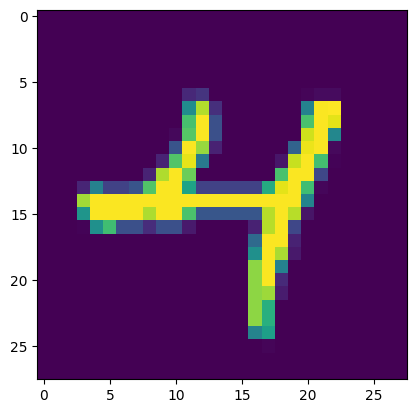

In [26]:
rnd = random.randint(0,42001)
plt.imshow(X_train[rnd,:])
print(np.argmax(y_train[rnd]))

In [27]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten

In [28]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", padding="valid", input_shape=(28,28,1)),
    Conv2D(32, (3,3), activation="relu", padding="valid"),
    MaxPooling2D(),
    Conv2D(64, (3,3), activation="relu", padding="valid"),
    Conv2D(64, (3,3), activation="relu", padding="valid"),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation="relu"),
    Dense(10, activation="softmax"),
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
pred = model.fit(X_train, y_train, batch_size=128, epochs=50)

Epoch 1/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8574 - loss: 0.4768
Epoch 2/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9826 - loss: 0.0517
Epoch 3/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9900 - loss: 0.0295
Epoch 4/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9932 - loss: 0.0200
Epoch 5/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9948 - loss: 0.0153
Epoch 6/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9964 - loss: 0.0117
Epoch 7/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9973 - loss: 0.0088
Epoch 8/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9973 - loss: 0.0087
Epoch 9/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9969 - loss: 0.0092
Epoch 10/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9975 - loss: 0.0066
Epoch 11/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9977 - loss: 0.0072
Epoch 12/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [30]:
predictions = model.predict(X_test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [38]:
predictions[1]

array([9.9999678e-01, 1.2303728e-09, 2.1841724e-06, 6.8569955e-10,
       2.0716673e-08, 3.1005993e-09, 1.0696543e-06, 3.8823784e-11,
       8.4344415e-10, 2.8281346e-09], dtype=float32)

In [36]:
y_pred = np.argmax(predictions, axis=1)

7


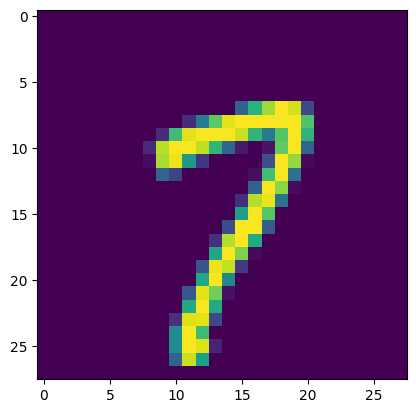

In [37]:
random2=random.randint(0,875)
plt.imshow(X_test[random2,:])
print(y_pred[random2])

In [ ]:
subm = pd.DataFrame()
subm["ImageId"] = range(1,len(y_pred)+1)
subm["Label"] = y_pred

In [ ]:
subm.tail()

In [ ]:
subm.to_csv("submission.csv", index=False)